In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d camnugent/california-housing-prices

mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 400k/400k [00:00<00:00, 792kB/s]
100% 400k/400k [00:00<00:00, 792kB/s]


In [3]:
!unzip california-housing-prices.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [4]:
import pandas as pd

housing_pd = pd.read_csv('housing.csv')
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_pd['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
shuffled_pd = housing_pd.sample(n=len(housing_pd), random_state=1)
shuffled_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [7]:
pd.get_dummies(shuffled_pd['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [8]:
shuffled_pd.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [9]:
final_pd = pd.concat([shuffled_pd.drop('ocean_proximity', axis=1),
                      pd.get_dummies(shuffled_pd['ocean_proximity'])], axis=1)
final_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [14]:
final_pd = final_pd[['longitude',	'latitude',
                     'housing_median_age',	'total_rooms',
                     'total_bedrooms', 'population',
                     'households',	'median_income', '<1H OCEAN',
                     'INLAND', 'ISLAND', 'NEAR BAY',
                     'NEAR OCEAN', 'median_house_value']]
final_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [17]:
final_pd = final_pd.dropna()
len(final_pd)

20433

In [19]:
train_pd, test_pd, val_pd = final_pd[:18000], final_pd[18000:19215], final_pd[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1215, 1218)

In [25]:
x_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
x_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
x_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1215, 13), (1215,))

In [42]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler= StandardScaler().fit(x_train[:, :8])

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

x_train, x_val, x_test = preprocessor(x_train), preprocessor(x_val), preprocessor(x_test)
x_train.shape, x_val.shape, x_test.shape

((18000, 13), (1218, 13), (1215, 13))

In [43]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.276840,0.328234,-0.326667,1.0,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0.0,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0.0,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.079740,-1.082862,-1.235508,0.0,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1.0,0.0,0.0,0.0,0.0


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

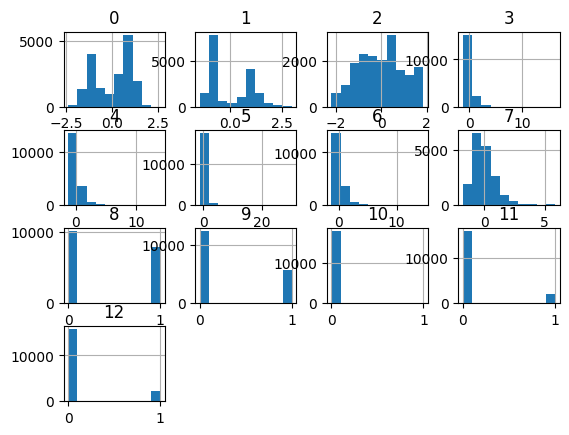

In [44]:
pd.DataFrame(x_train).hist()

In [46]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(x_train, y_train)
mse(lm.predict(x_train), y_train, squared=False), mse(lm.predict(x_val), y_val, squared=False)

(68593.05578127236, 71382.43558330165)

In [52]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(x_train, y_train)
mse(knn.predict(x_train), y_train, squared=False), mse(knn.predict(x_val), y_val, squared=False)

(53759.09908812057, 62161.22860469906)

In [56]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10).fit(x_train, y_train)
mse(rfr.predict(x_train), y_train, squared=False), mse(rfr.predict(x_val), y_val, squared=False)

(43488.98132857104, 53301.63699557763)

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=250).fit(x_train, y_train)
mse(gbr.predict(x_train), y_train, squared=False), mse(gbr.predict(x_val), y_val, squared=False)

(47274.82259072157, 51219.66315476293)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 2s 3ms/step - loss: 50598182912.0000 - root_mean_squared_error: 224940.4062 - val_loss: 41293500416.0000 - val_root_mean_squared_error: 203208.0156
Epoch 2/100
563/563 [==============================] - 1s 3ms/step - loss: 31127519232.0000 - root_mean_squared_error: 176429.9219 - val_loss: 23972272128.0000 - val_root_mean_squared_error: 154829.8125
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 18928107520.0000 - root_mean_squared_error: 137579.4531 - val_loss: 13588518912.0000 - val_root_mean_squared_error: 116569.8047
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 8759457792.0000 - root_mean_squared_error: 93591.9766 - val_loss: 5575283712.0000 - val_root_mean_squared_error: 74667.8203
Epoch 5/100
563/563 [==============================] - 1s 3ms/step - loss: 5154371072.0000 - root_mean_squared_error: 71793.9453 - val_loss: 5239746560.0000 - val_root_mean_squared_error: 7238

In [70]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(x_train), y_train, squared=False), mse(simple_nn.predict(x_val), y_val, squared=False)

39/39 [==============================] - 0s 2ms/step


(65975.60395807817, 68610.56574946982)

In [71]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 3s 4ms/step - loss: 8810932224.0000 - root_mean_squared_error: 93866.5625 - val_loss: 5061139968.0000 - val_root_mean_squared_error: 71141.6875
Epoch 2/100
563/563 [==============================] - 2s 4ms/step - loss: 4496376832.0000 - root_mean_squared_error: 67055.0312 - val_loss: 4705151488.0000 - val_root_mean_squared_error: 68594.1094
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 4401615872.0000 - root_mean_squared_error: 66344.6719 - val_loss: 4626950144.0000 - val_root_mean_squared_error: 68021.6875
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 4299466752.0000 - root_mean_squared_error: 65570.3203 - val_loss: 4604247040.0000 - val_root_mean_squared_error: 67854.6016
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 4241596672.0000 - root_mean_squared_error: 65127.5430 - val_loss: 4753393664.0000 - val_root_mean_squared_error: 68944.8594
Epoch

In [72]:
medium_nn = load_model('models/simple_nn')
mse(medium_nn.predict(x_train), y_train, squared=False), mse(medium_nn.predict(x_val), y_val, squared=False)

39/39 [==============================] - 0s 2ms/step


(65975.60395807817, 68610.56574946982)

In [73]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=x_train, y=y_train, validation_data=(x_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 4s 4ms/step - loss: 6744168448.0000 - root_mean_squared_error: 82122.8828 - val_loss: 4928601088.0000 - val_root_mean_squared_error: 70204.0000
Epoch 2/100
563/563 [==============================] - 3s 6ms/step - loss: 4536166912.0000 - root_mean_squared_error: 67351.0703 - val_loss: 4505682944.0000 - val_root_mean_squared_error: 67124.3828
Epoch 3/100
563/563 [==============================] - 3s 5ms/step - loss: 4106326016.0000 - root_mean_squared_error: 64080.6211 - val_loss: 4235048704.0000 - val_root_mean_squared_error: 65077.2500
Epoch 4/100
563/563 [==============================] - 2s 4ms/step - loss: 4277192192.0000 - root_mean_squared_error: 65400.2461 - val_loss: 4106367488.0000 - val_root_mean_squared_error: 64080.9453
Epoch 5/100
563/563 [==============================] - 2s 4ms/step - loss: 3727968256.0000 - root_mean_squared_error: 61057.0898 - val_loss: 3736774144.0000 - val_root_mean_squared_error: 61129.1602
Epoch

In [74]:
large_nn = load_model('models/simple_nn')
mse(large_nn.predict(x_train), y_train, squared=False), mse(large_nn.predict(x_val), y_val, squared=False)

39/39 [==============================] - 0s 2ms/step


(65975.60395807817, 68610.56574946982)

In [75]:
mse(gbr.predict(x_test), y_test, squared=False)

49426.71245398596